   Epoch  train_loss  train_acc  val_loss    val_acc
0    1.0    3.835469  20.253561  3.187875  54.685731
1    2.0    3.250056  54.949515  2.869685  63.594502
2    3.0    2.898270  66.701736  2.784335  67.213484
3    4.0    2.720960  70.282562  2.695073  69.308764
4    5.0    2.592383  71.715390  2.574020  70.707896
   Epoch  train_loss  train_acc  val_loss    val_acc
0    1.0    4.005847   1.786962  3.953326   6.608389
1    2.0    3.904310   6.608862  3.842438  21.947987
2    3.0    3.799298  17.511271  3.743436  37.664460
3    4.0    3.692365  31.444348  3.630713  50.036237
4    5.0    3.583961  43.989059  3.516806  57.477557
   Epoch  train_loss  train_acc  val_loss    val_acc
0    1.0    3.755354  28.937547  3.372558  52.266651
1    2.0    2.999580  60.393826  2.842500  67.424638
2    3.0    2.565045  71.309059  2.654036  72.177945
3    4.0    2.324165  75.027254  2.357328  75.166304
4    5.0    2.154795  77.295204  2.161694  77.387963
   Epoch  train_loss  train_acc  val_loss    v

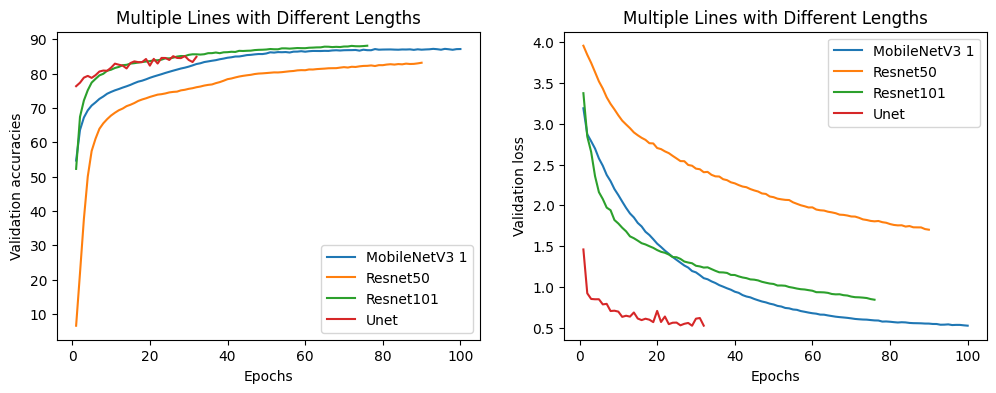

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista de nombres de archivos CSV y modelos
csv_files = ['MobileNetV3.csv', 'Resnet50.csv', 'Resnet101.csv', 'Unet.csv']
model_names = ['MobileNetV3 1', 'Resnet50', 'Resnet101', 'Unet']

# Inicializar listas para almacenar datos
val_loss_data = []
val_acc_data = []
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# Leer datos de los archivos CSV y almacenar en las listas
for i, csv_file in enumerate(csv_files):
    df = pd.read_csv(r".\results\\" + csv_file)
    print(df.head())
    ax1.plot(df["Epoch"], df["val_acc"], label=model_names[i])
    ax2.plot(df["Epoch"], df["val_loss"], label=model_names[i])



# Plot the data


# Set labels and title
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Validation accuracies')
ax1.set_title('Multiple Lines with Different Lengths')

# Add a legend
ax1.legend()

ax2.set_xlabel('Epochs')
ax2.set_ylabel('Validation loss')
ax2.set_title('Multiple Lines with Different Lengths')

# Add a legend
ax2.legend()

# Show the plot
plt.show()

False
Real classes: ['none', 'hair', 'skin', 'sunglasses', 'vest', 'blouse', 'skirt', 'stockings', 'shoes']
Predicted classes: ['none', 'hair', 'skin', 'blouse', 'blazer', 'suit', 'shorts', 'dress', 'jacket', 'coat', 'jeans', 'bag', 'skirt', 'shoes']


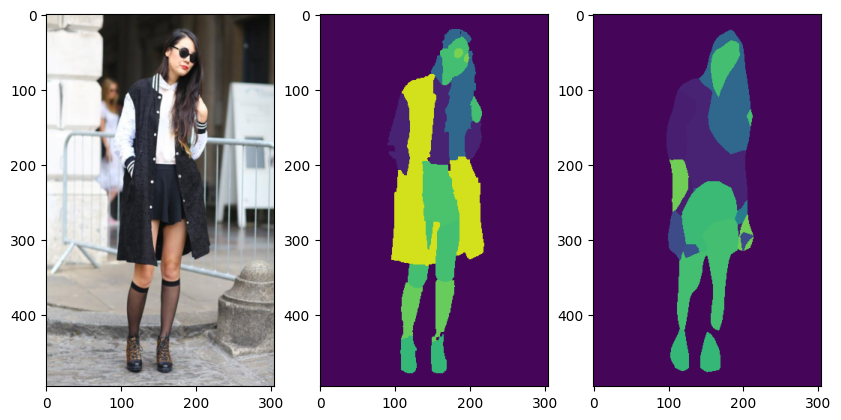

False
Real classes: ['none', 'hair', 'skin', 'jacket', 'dress', 'socks', 'pumps']
Predicted classes: ['none', 'hair', 'skin', 'jacket', 'dress', 'shoes']


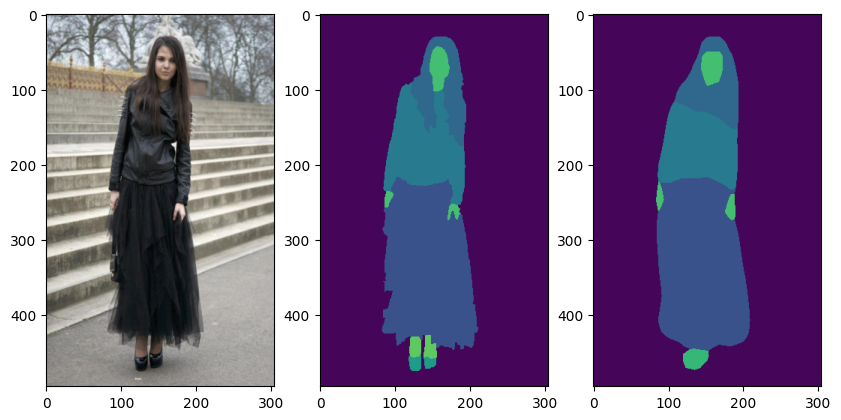

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001F15472FD30> (for post_execute):



KeyboardInterrupt



In [46]:

import numpy as np
from torchvision.transforms import transforms, InterpolationMode
from CustomClothingDataset import CustomClothingDataset
from LabelManagement.LabelDecoder import LabelDecoder
import torch
full_dataset = CustomClothingDataset(root_dir=r".\data",                 
                                     transform_input=transforms.Compose([
                     transforms.Resize((496, 304), interpolation=InterpolationMode.BILINEAR, antialias=True)
                 ]),
                                     
                                     transform_labels=transforms.Compose([
                    transforms.Resize((496, 304), interpolation=InterpolationMode.NEAREST_EXACT),
                 ]))
count = 0
max_test = 10
decoder = LabelDecoder(class_dict_path="./data/class_dict.csv", encoder_path='one_hot_encoder.joblib')

path = "./results/MobileNetV3.pth"
model = torch.load(path).to("cpu")
transforms_for_model = transforms.Compose([
                transforms.Lambda(lambda x: x / 255),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),# normalizo
    ])
    
    
def model_output(model, x):
    out = model(transforms_for_model(x.unsqueeze(0)))["out"].argmax(1).squeeze(0)
    return torch.zeros_like(y).scatter_(0, out.unsqueeze(0), 1.)
    
    
for x,y in full_dataset:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.imshow(np.transpose(x.int(), (1, 2, 0)))
    plt.subplot(1, 3, 2)
    label, classes = decoder.decode_labels(y)
    plt.imshow(label)
    plt.title("Label")
    plt.subplot(1, 3, 3)
    predict, classes_predicted = decoder.decode_labels(model_output(model, x))
    plt.imshow(predict)
    plt.title("Predict")
    
    image_predict = pd.DataFrame({'array_value': predict.reshape(-1, 3).tolist()}).drop_duplicates()
    image_label = pd.DataFrame({'array_value': label.reshape(-1, 3).tolist()}).drop_duplicates()
    print(image_predict.items() == image_label.items())

    
    
    
    print("Real classes:", classes)
    print("Predicted classes:", classes_predicted)
    plt.show()
    count+=1
    if count >= max_test:
        break